<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF280 - Estadística Computacional </h1>
    <h2> Generación de Variables Aleatorias </h2>
    <h2> Version: 0.04 </h2>
    <h2> Ay. Nicolás Armijo Calquín </h2> 
    <h2> Ay. Eva Wang Liu </h2>
</center>

<div id='toc'>

## Tabla de Contenidos

* [Introducción](#intro)
* [Pseudo-aleatoriedad](#pseudo_aleatoriedad)
* [Generación de datos aleatorios en Python](#generacion_datos_aleatorios_python)
    * [NumPy Random](#numpy_random)
        * [Semillas](#numpy_semillas)
        * [RNGs](#numpy_rngs)
        * [Números aleatorios](#numeros_aleatorios)
        * [Elecciones aleatorias](#elecciones_aleatorias)
        * [Distribuciones estadísticas](#numpy_distribuciones_estadisticas)
        * [Procesamiento en paralelo](#numpy_procesamiento_paralelo)
    * [SciPy Stats](#scipy_stats)
        * [Distribuciones estadísticas](#scipy_distribuciones_estadisticas)
        * [PDF y CDF](#pdf_cdf)
* [Método de la transformada inversa](#metodo_transformada_inversa)
    * [Ejemplo](#metodo_transformada_inversa_ejemplo)
* [Referencias](#referencias)
* [Historial de versiones](#hist)

<div id='intro'>

## Introducción

Cuando intentamos modelar situaciones de la vida real, nos encontramos con el desafío de que estas se ajustan a distribuciones complejas y específicas. Las variables aleatorias suelen seguir distribuciones de probabilidad que reflejan fenómenos específicos, por lo que hacer uso de ellas permite que nuestros modelos se acerquen más a la realidad.

En palabras simples, para simular variables aleatorias debemos generar números uniformes y transformarlos a valores de una distribución de probabilidad mediante una función específica. Aunque en la actualidad múltiples módulos en lenguajes de programación permiten la realización de este proceso rápidamente, también existen varios procedimientos para lograr este procedimiento manualmente, tales como el método de la transformada inversa.

En el presente Jupyter Notebook, exploraremos los distintos métodos y funciones que residen en las librerías NumPy y Scipy en Python que nos permiten generar datos aleatorios. Por último, también revisaremos el método de la transformada lineal para la generación de variables aleatorias.

Antes de partir, importaremos las librerías que complementarán nuestro trabajo:

In [1]:
# Importamos librerías complementarias
import pandas as pd
import matplotlib.pyplot as plt

<div id='pseudo-aleatoriedad'>

## Pseudo-aleatoriedad

Cuando intentamos generar datos aleatorios mediante algoritmos computacionales, por más que estos aparenten ser y cumplan con las propiedades estadísticas esperadas, **no son realmente aleatorios**: son **pseudo-aleatorios**.

Lo anterior se debe a que los algoritmos computacionales funcionan de manera **determinista**, es decir que siguen una secuencia de pasos **reproducible** a partir de una **semilla** o valor inicial. Por lo tanto, dicha semilla siempre producirá la misma secuencia de números pseudo-aleatorios para distintas ejecuciones del algoritmo computacional determinista.

No obstante, los datos pseudo-aleatorios son estadísticamente indistinguibles de una secuencia realmente aleatoria, al menos para propósitos tales como las simulaciones, por lo que serán suficiente para nuestro uso.

Por brevedad, en este Jupyter Notebook describiremos como aleatorios a los datos generados con algoritmos computacionales, pero no hay que olvidar que estos son realmente pseudo-aleatorios.

<div id='generacion_datos_aleatorios_python'>

## Generación de datos aleatorios en Python

A continuación, exploraremos los módulos NumPy Random y SciPy Stats de Python, los cuales nos permiten la generación de datos (números y variables) aleatorios simples de forma rápida y eficiente.

<div id='NumPy Random'>

### NumPy Random

Random es un submódulo de NumPy que implementa generadores de números aleatorios, con la habilidad de extraer muestras de una variedad de distribuciones de probabilidad.

Se adjuntan distintos recursos que les puede ser de utilidad:

* **Documentación oficial** https://numpy.org/doc/stable/reference/random/index.html

In [1]:
# Importamos NumPy - Debemos instalarlo con pip install numpy
import numpy as np

<div id='numpy_semillas'>

#### Semillas

Por defecto, NumPy establece la **hora** como la semilla de sus algoritmos computacionales a la hora de generar datos aleatorios.

Una práctica bastante común es modificar la semilla al principio del código haciendo uso de la función `np.random.seed`, de tal modo que se asegura que el algoritmo es reproducible. No obstante, pese a que puede resultar conveniente en algunas ocasiones, es una mala práctica.

<div id='numpy_rngs'>

#### RNGs

Cuando importamos la librería NumPy, un RNG (Generador de Números Pseudo-Aleatorios) es creado y ocupado para generar secuencias de números aleatorios.

Cuando usamos la función `np.random.seed`, cambiamos la semilla del RNG ya creado. Por lo tanto, una mejor práctica corresponde a crear un nuevo RNG al principio del código haciendo uso de la función `np.random.default_rng` a la cual le podemos ingresar nuestra propia semilla (Numpy sugiere un entero lo suficientemente grande para asegurar reproducibilidad e independencia) si queremos reproducibilidad y usarlo en el resto del código.

Se adjuntan distintos recursos que les puede ser de utilidad:

* **Documentación oficial** https://numpy.org/doc/stable/reference/random/generator.html
* **Blog sobre buenas prácticas** https://blog.scientific-python.org/numpy/numpy-rng/

In [6]:
# Una forma de obtener un entero grande y aleatorio. Utilizar este resultado para la semilla
import secrets
secrets.randbits(128)

# Luego de este asignar a una variable y utilizar: seed = 122387542080510207761449878547245793940

122387542080510207761449878547245793940

In [2]:
# Creamos un nuevo RNG - Usaremos la semilla 0 para simplificar
rng = np.random.default_rng(0)

<div id='numeros_aleatorios'>

#### Números aleatorios

Tal como fue introducido en `CH0-Pandas-NumPy`, algunas funciones de NumPy que nos permiten generar números aleatorios de forma simple son:

* `rng.integers`: genera números aleatorios de tipo **entero**.

* `rng.random`: genera números aleatorios de tipo **punto flotante** en una distribución uniforme.

In [3]:
# Generamos un ndarray de 10 números de tipo punto flotante en el intervalo [0, 1)
rng.random(size=10)

array([0.63696169, 0.26978671, 0.04097352, 0.01652764, 0.81327024,
       0.91275558, 0.60663578, 0.72949656, 0.54362499, 0.93507242])

Por ejemplo, si creamos otro RNG con la misma semilla deberíamos volver a obtener los mismos números aleatorios. Cabe mencionar que cada vez que se vuelve a llamar al RNG se generaran los números que siguen dentro de la secuencia determinista del generador, es por esto que hay que tener ojo con cuantas veces se ejecuta el generador (es decir, si vuelvo a ejecutar el rng los resultados cambiarán).


In [7]:
# Nuevo RNG con la misma semilla
rng2 = np.random.default_rng(0)

rng2.random(size=10)

array([0.63696169, 0.26978671, 0.04097352, 0.01652764, 0.81327024,
       0.91275558, 0.60663578, 0.72949656, 0.54362499, 0.93507242])

In [8]:
# Nueva ejecución del RNG. Tener cuidado de ejeuctar una celda más de una vez (en caso de buscar reproducibilidad)
rng.random(size=10)

array([0.81585355, 0.0027385 , 0.85740428, 0.03358558, 0.72965545,
       0.17565562, 0.86317892, 0.54146122, 0.29971189, 0.42268722])

<div id='Elecciones_aleatorias'>

#### Elecciones aleatorias

NumPy también nos permite mezclar un arreglo aleatoriamente o elegir aleatoriamente en un arreglo mediante las siguientes funciones:

* `rng.choice`: genera una muestra aleatoria a partir de un arreglo.

* `rng.shuffle`: modifica un arreglo mezclando su contenido.

* `rng.permutation`: genera un nuevo arreglo permutado.

In [5]:
# Escogemos una muestra aleatoria en un arreglo
rng.choice(["Rojo", "Azul", "Amarillo"])

'Amarillo'

<div id='numpy_distribuciones_estadisticas'>

#### Distribuciones estadísticas

Para la generación de variables aleatorias, NumPy proporciona varias funciones dependiendo de la distribución de probabilidad que estas siguen. Algunas de estas funciones son:

* `rng.uniform`: genera muestras de una **distribución uniforme**.

* `rng.normal`: genera muestras de una **distribución normal** (gaussiana).

* `rng.exponential`: genera muestras de una **distribución exponencial**.

* `rng.binomial`: genera muestras de una **distribución binomial**.

* `rng.poisson`: genera muestras de una **distribución de Poisson**.

* `rng.multivariate_normal`: genera muestras de una **distribución normal multivariada**.

In [6]:
# Generamos 10 muestras de una distribución uniforme en el intervalo [0, 55)
rng.uniform(low=0, high=55, size=10)

array([17.99651962,  5.88414012, 31.76545046, 24.20890084, 16.48662047,
       54.96236735,  0.64194817, 30.82670305, 48.96905493, 51.72583903])

<div id='numpy_procesamiento_paralelo'>

#### Procesamiento en paralelo

El procesamiento en paralelo es la ejecución simultánea de múltiples tareas o procesos a la vez. En esta asignatura no es necesario implementarlo, pero lo explicaremos brevemente. 

Cuando tenemos funciones muy costosas que realizan muchas tareas (por ejemplo, en simulaciones de Monte Carlo) podemos acelerar el tiempo de computación usando procesamiento en paralelo. No obstante, tenemos que tener cuidado cuando usamos RNGs en conjunto con procesamiento en paralelo, pues si pasamos nuestro RNG creado al principio del código a cada proceso que se va a ejecutar en paralelo, cada proceso va a producir el mismo resultado. Esto se puede solucionar haciendo uso del algoritmo `SeedSequence`.

Se adjuntan distintos recursos que les puede ser de utilidad:

* **Documentación oficial** https://numpy.org/doc/stable/reference/random/parallel.html#seedsequence-spawning

<div id='scipy_stats'>

### SciPy Stats

Stats es un submódulo de Scipy que, al igual que Random de NumPy, se dedica a la generación de variables aleatorias. No obstante, ofrece una funcionalidad estadística más avanzada: contiene una gran cantidad de distribuciones de probabilidad, resumen y estadísticas de frecuencia, entre otros.

Se adjuntan distintos recursos que les puede ser de utilidad:

* **Documentación oficial** https://docs.scipy.org/doc/scipy/reference/stats.html

In [7]:
# Importamos Scipy - Debemos instalarlo con pip install scipy
import scipy

<div id='scipy_distribuciones_estadisticas'>

#### Distribuciones estadísticas

Para generar muestras aleatorias en distribuciones estadísticas usando SciPy, ocupamos el método `rvs` sobre la distribución estadística que es de nuestro interés:

* `scipy.stats.uniform.rvs`: genera muestras de una **distribución uniforme**.

* `scipy.stats.norm.rvs`: genera muestras de una **distribución normal** (gaussiana).

* `scipy.stats.expon.rvs`: genera muestras de una **distribución exponencial**.

* `scipy.stats.binom.rvs`: genera muestras de una **distribución binomial**.

* `scipy.stats.poisson.rvs`: genera muestras de una **distribución de Poisson**.

* `scipy.stats.multivariate_normal.rvs`: genera muestras de una **distribución normal multivariada**.

In [8]:
# Generamos 10 muestras de una distribución uniforme en el intervalo [0, 55] 
scipy.stats.uniform.rvs(loc=0, scale=55, size=10)

array([14.20843295, 50.92265681,  0.2916002 , 15.41758294, 16.67575403,
        8.13973803, 32.57481101,  7.09480866, 47.8586332 , 31.47323209])

<div id='pdf_cdf'>

#### PDF y CDF

Los siguientes métodos de SciPy también nos pueden resultar de utilidad:

* `pdf`: genera una **función de densidad de probabilidad (pdf)**.

* `cdf`: genera una **función de distribución acumulada (cdf)**.

Estos métodos funcionan de manera análoga al método `rvs` revisado anteriormente; es decir, se aplican sobre la distribución estadística que es de nuestro interés.

<div id='metodo_transformada_inversa'>

## Método de la transformada inversa

El método de la transformada inversa es una técnica para generar variables aleatorias a partir de la transformación de números uniformes a valores de una distribución de probabilidad mediante una función específica. Este método aprovecha la propiedad de las funciones de probabilidad acumulada, en las cuales su recorrido siempre se encontrará en el intervalo cerrado $[0,1]$.

Supongamos que queremos generar una variable aleatoria $X$ la cual tiene una función de probabilidad que sigue:

$$P(X=x_j)=\left\{\begin{array}{lr} x_0    & p_0 \\ \\
                                    x_1    & p_1 \\ \\
                                    x_2    & p_2 \\ \\
                                    \vdots &     \\ \\
                                    x_n    & p_n \end{array}\right.$$

Nuestra misión es generar eventos aleatorios $X = x_j$ tal que cumpla con la función de probabilidad. Para esto nos apoyaremos en 
los números aleatorios y en la función de distribución de $X$ la cual denotaremos como $F_x$.

Generaremos un número aleatorio $U$ que siga una distribución uniforme $(0,1)$, es decir, $U \sim U(0,1)$. Luego de esto, 
aprovecharemos la siguiente propiedad: dados $a,b$ que cumplan $0<a<b<1$, se tiene que $P\{a\leq U<b\}=b-a$. Con esta propiedad 
en mente, contruimos la función de probabilidad anterior de la siguiente forma:

$$P\{X=x_i\}=\left\{\sum_{i=0}^{j-1}p_i\leq U<\sum_{i=0}^{j}p_i\right\}=p_j$$

Entonces, podemos generar $X$ siguiendo la siguiente regla:

$$X=\left\{\begin{array}{lcc} x_0    & si & U   \leq p_0                                \\ \\
                              x_1    & si & p_0 \leq U<p_0+p_1                          \\ \\
                              \vdots &    &                                             \\ \\
                              x_j    & si & \sum_{i=0}^{j-1}p_i\leq U<\sum_{i=0}^{j}p_i \\
                              \vdots &    &                                             \end{array}\right.$$

Por último, si tenemos los $x_i$ ordenados tal que, $x_1<x_2<\cdots$, tendremos que $X$ será $x_j$ si $F_X(x_{j-1})\leq U<F_X(x_j)
$.

En resumen, este método consiste en los siguientes 3 pasos:

1. Generar un número aleatorio $u$ (computacionalmente son pseudo-aleatorios), tal que siga una distribución uniforme $(0,1)$, es decir $u\sim U(0,1)$.

2. Hallar la inversa de la función de probabilidad acumulada $F^{-1}_X(x)$.

3. Finalmente, calcular $X=F^{-1}_X(u)$. Así habremos generado $X=x$ que siga la distribución de $F_X$.

A continuación, se presentará un ejemplo introductorio al método de la transformada inversa.

<div id='metodo_transformada_inversa_ejemplo'>

### Ejemplo

Queremos simular una variable aleatoria $X$ tal que $p_1 = 0.10$, $p_2 = 0.25$, $p_3 = 0.60$, $p_4 = 0.05$

In [9]:
# Creamos un DataFrame de Pandas para llevar la cuenta de ocurrencia de cada variable x_i
# Se crean 4 DataFrames para llevar el registro de 4 simulaciones distintas
X_1 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])
X_2 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])
X_3 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])
X_4 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])

X_1

,count
x_1,0
x_2,0
x_3,0
x_4,0


In [10]:
# Método de la transformada inversa
def generator(df):
    # Utilizamos NumPy para generar un número pseudoaleatorio de distribución uniforme(0,1)
    U = np.random.random()
    # Dependiendo del intervalo de U, generamos x_i utilizando F_X
    if U < 0.1:
        df['count']['x_1'] += 1
    elif U < 0.35:
        df['count']['x_2'] += 1
    elif U < 0.95:
        df['count']['x_3'] += 1
    else:
        df['count']['x_4'] += 1
    return

In [11]:
## Definimos la función sim para simular nuestro algoritmo n veces y así analizar la distribución de las variables generadas
def sim(n, X):
    for i in range(n):
        generator(X)
    return

A continuación, vamos a realizar distintas simulaciones para ver cómo se comporta nuestro generador de variables aleatorias, y si 
este en realidad genera las variables con la probabilidad exigida.

In [12]:
# Simulamos 100 veces y calculamos la probabilidad de cada x_i
sim(100, X_1)
X_1 /= 100

X_1

,count
x_1,0.06
x_2,0.22
x_3,0.62
x_4,0.10


In [13]:
# Simulamos 1000 veces y calculamos la probabilidad de cada x_i
sim(1000, X_2)
X_2 /= 1000

X_2

,count
x_1,0.122
x_2,0.246
x_3,0.579
x_4,0.053


In [14]:
## Simulamos 10000 veces y calculamos la probabilidad de cada x_i
sim(10000, X_3)
X_3 /= 10000

X_3

,count
x_1,0.1000
x_2,0.2566
x_3,0.5948
x_4,0.0486


In [15]:
## Simulamos 100000 veces y calculamos la probabilidad de cada x_i
sim(100000, X_4)
X_4 /= 100000

X_4

,count
x_1,0.09826
x_2,0.25029
x_3,0.59957
x_4,0.05188


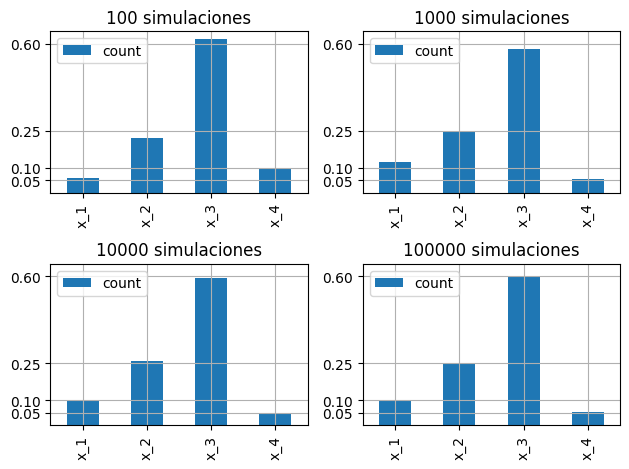

In [16]:
marcas = [0.05,0.10,0.25,0.60]
ylim = [0.0, 0.65]

fig, ax = plt.subplots(2,2)

X_1.plot.bar(ax= ax[0,0], grid= True, yticks=marcas, ylim= ylim)
X_2.plot.bar(ax= ax[0,1], grid= True, yticks=marcas, ylim= ylim)
X_3.plot.bar(ax= ax[1,0], grid= True, yticks=marcas, ylim= ylim)
X_4.plot.bar(ax= ax[1,1], grid= True, yticks=marcas, ylim= ylim)

ax[0,0].set_title("100 simulaciones")
ax[0,1].set_title("1000 simulaciones")
ax[1,0].set_title("10000 simulaciones")
ax[1,1].set_title("100000 simulaciones")

plt.tight_layout()
plt.show()

Podemos observar que nuestro generador cumple su función, y a medida que aumentamos la magnitud del orden de simulaciones, la probabilidad empírica tiende a nuestra probabilidad teórica.

Se adjuntan 2 gráficos que representan la idea detrás del método de la transformada inversa, tanto la VA discretas como continuas:

* <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/FDC-Geometrica.pdf/page1-610px-FDC-Geometrica.pdf.jpg?20201101071844"/>

* <img src="https://upload.wikimedia.org/wikipedia/commons/7/74/Inversion_method2.svg"/> 

<div id='referencias'>

## Referencias

* Thomas, A. (26 de enero de 2024). *Best Practices for Using NumPy's Random Number Generators*. Scientific Python Blog. 
* Ross, S. M. (2019). *Generating Discrete Random Variables*. En *Simulation* (pp. 49-66).

<div id='hist'>

# Historial de Versiones 

* **Versión v0.02:** Primera versión del material. - *3 de Septiembre del 2024*. 
* **Versión v0.03:** Mejores prácticas usando RNGs de NumPy y correcciones menores. - *7 de Septiembre del 2024*.
* **Versión v0.04:** Correcciones menores y ejemplos RNGs. - *20 de Septiembre del 2024* 
* **Versión v0.05:** Corrección menor de la tabla de contenidos. - *12 de Noviembre del 2024* 